In [1]:
from IPython.display import display, Image, HTML
import json
from pathlib import Path
import pandas as pd
import os
os.getcwd()
os.chdir("../../data/predictions/")
os.getcwd()

'c:\\Users\\robin\\Documents\\projets\\severityPrediction\\data\\predictions'

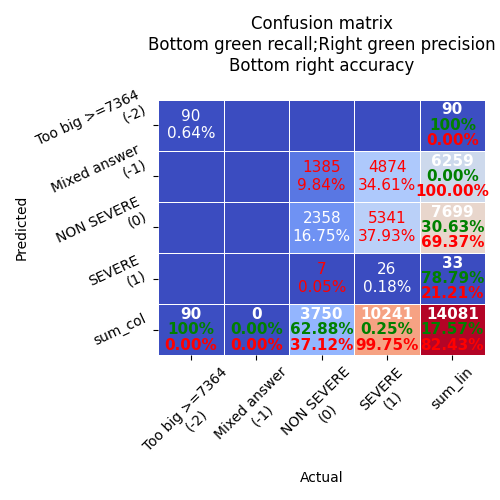

In [2]:
Image(filename='confusion_matrix.png') 

> The rows correspond to the predicted class (Output Class) and the columns correspond to the true class (Target Class). The diagonal cells correspond to observations that are correctly classified. The off-diagonal cells correspond to incorrectly classified observations. Both the number of observations and the percentage of the total number of observations are shown in each cell.
> 
> The column on the far right of the plot shows the percentages of all the examples predicted to belong to each class that are correctly and incorrectly classified. These metrics are often called the precision (or positive predictive value) and false discovery rate, respectively. The row at the bottom of the plot shows the percentages of all the examples belonging to each class that are correctly and incorrectly classified. These metrics are often called the recall (or true positive rate) and false negative rate, respectively. The cell in the bottom right of the plot shows the overall accuracy.

[Extract of the matlab documentation](https://www.mathworks.com/help/deeplearning/ref/plotconfusion.html;jsessionid=7052c44c75f9529f74ccd8187446)

In [3]:
with open("representants.json") as f:
    representants = json.load(f)
    mapping = representants['mapping']
    print("The mapping used is: ")
    for k,v in mapping.items():
        print(k," -> ",v)
    representants = {eval(k):v for k,v in representants['samples'].items()}



The mapping used is: 
-2  ->  Too big >=7364
-1  ->  Mixed answer
0  ->  NON SEVERE
1  ->  SEVERE


In [4]:
true = 0
pred = -1
pd.set_option('display.html.use_mathjax', False)
pd.set_option('display.html.table_schema', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'center')
df = pd.DataFrame(representants[pred,true])
def format_text_as_html(text):
    text = text.replace('\t', '&#9;')
    text = text.replace('\n', '<br>')
    return text
def map_to_name(digit):
    return mapping[str(digit)]
df['description'] = df['description'].apply(format_text_as_html)
df['true'] = df['true'].apply(map_to_name)
df['pred'] = df['pred'].apply(map_to_name)
html = df.to_html(escape=False, index=False, classes='my-table')
css = ".dataframe > tbody td { \ntext-align: left; \n}\n"
html = f'<style>{css}</style>\n{html}'
display(HTML(html))